In [1]:
import sqlite3
import numpy as np
import mysql.connector
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='mainakchain', api_key='B9m4DVrYYmsoW3jDSiok')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from scipy import stats
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
import datetime
import holidays
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
toll_time = pd.read_csv('toll_time.csv')

In [3]:
# new_toll_time = toll_time[toll_time['origin'] == 'Jamshedpur'][toll_time['destination'] == 'HOSUR']

In [4]:
toll_time.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
toll_time['route'] = toll_time['origin'] + ' ' + toll_time['destination']

In [6]:
def change_route_to_dummy(df):
    num = 1
    dict_route = {}
    for r in df['route'].unique().tolist():
        df['route'] = df['route'].replace({r: num})
        dict_route[num] = r
        num += 1
    return dict_route

In [7]:
dict_route = change_route_to_dummy(toll_time)

In [8]:
toll_time.shape

(6425, 18)

In [9]:
new_toll_time = toll_time.copy()

In [67]:
today_date = datetime.datetime.now()
today_date.strftime("%Y-%m-%d %H:%M:%S")
today = today_date.strftime("%Y-%m-%d %H:%M:%S")
new_toll_time['today'] = datetime.datetime.strptime(today, '%Y-%m-%d %H:%M:%S')

In [11]:
new_toll_time['start_date'] = new_toll_time['start_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
new_toll_time['days_from_now'] = new_toll_time['today'] - new_toll_time['start_date'] 
new_toll_time['days_from_now'] = new_toll_time['days_from_now'].apply(lambda x: x.days)

In [12]:
new_toll_time['unloading_in_time'] = new_toll_time['unloading_in_time'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
new_toll_time['avg_travel_time'] = new_toll_time['start_date'] + (new_toll_time['unloading_in_time'] - new_toll_time['start_date'])/2

In [13]:
new_toll_time['month_of_travel'] = new_toll_time['avg_travel_time'].apply(lambda x: x.month)

In [14]:
new_toll_time['ist_timestamp'] = new_toll_time['ist_timestamp'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
new_toll_time['time_of_travel'] = new_toll_time.ist_timestamp.apply(lambda x: x.hour)

In [15]:
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({3:'midnight',4:'midnight',5:'midnight',6:'midnight'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({7:'morning',8:'morning',9:'morning',10:'morning'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({11:'noon',12:'noon',13:'noon',14:'noon'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({15:'afternoon',16:'afternoon',17:'afternoon',18:'afternoon'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({19:'evening',20:'evening',21:'evening',22:'evening'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({23:'night',0:'night',1:'night',2:'night'})

new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({'midnight':1,'morning':2,'noon':3,'afternoon':4,'evening':5,'night':6})

In [16]:
new_toll_time['day_of_travel'] = new_toll_time['avg_travel_time'].apply(lambda x: x.weekday())

In [17]:
new_toll_time['season_of_travel'] = new_toll_time['month_of_travel'].replace({12:'Winter',1:'Winter',2:'Winter'})
new_toll_time['season_of_travel'] = new_toll_time['season_of_travel'].replace({3:'Summer',4:'Summer',5:'Summer'})
new_toll_time['season_of_travel'] = new_toll_time['season_of_travel'].replace({6:'Rainy',7:'Rainy',8:'Rainy',9:'Rainy'})
new_toll_time['season_of_travel'] = new_toll_time['season_of_travel'].replace({10:'Autumn',11:'Autumn'})

new_toll_time['season_of_travel'] = new_toll_time['season_of_travel'].replace({'Winter':1,'Summer':2,'Rainy':3,'Autumn':4})

In [18]:
def change_vehicle_no_to_dummy(df):
    num = 1
    dict_vehicle_no = {}
    for truck in df['vehicle_no'].unique().tolist():
        df['vehicle_no'] = df['vehicle_no'].replace({truck: num})
        dict_vehicle_no[num] = truck
        num += 1
    return dict_vehicle_no

In [19]:
def change_toll_booth_to_dummy(df):
    num = 1
    dict_toll_both = {}
    for toll in df['toll_both'].unique().tolist():
        df['toll_both'] = df['toll_both'].replace({toll: num})
        dict_toll_both[num] = toll
        num += 1
    return dict_toll_both

In [20]:
dict_toll_both = change_toll_booth_to_dummy(new_toll_time)

In [21]:
def change_delivery_status_to_dummy(df):
    df['delivery_status'] = df['delivery_status'].replace({'early':1,'on-time':2,'late':3})

In [22]:
new_toll_time['loading_out_time'] = new_toll_time['loading_out_time'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )


In [23]:
new_toll_time = new_toll_time.sort_values(['route','vehicle_no','time_taken'])

In [24]:
def time_between_toll(df):
    for truck in df.vehicle_no.unique().tolist():
        for route in df.route.unique().tolist():
            if df[(df.vehicle_no == truck) & (df.route == route)].shape[0] == 1:
                continue
            elif df[(df.vehicle_no == truck) & (df.route == route)].shape[0] > 1 :
                df['time_btn_toll'][(df['vehicle_no'] == truck) & (df['route'] == route)] = df['time_taken'][(df['vehicle_no'] == truck) & (df['route'] == route)].diff()
            else:
                continue
    return df

In [24]:
new_toll_time['time_btn_toll'] = 0
new_toll_time = time_between_toll(new_toll_time)
new_toll_time['time_btn_toll'] = new_toll_time['time_btn_toll'].fillna(0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [25]:
new_toll_time['loading_out_time'] = new_toll_time['loading_out_time'].apply(lambda x: x.hour)

In [26]:
new_toll_time.late_by_hrs = new_toll_time.late_by_hrs.round()

In [52]:
new_toll_time.columns.tolist()

['origin',
 'destination',
 'toll_both',
 'vehicle_no',
 'loading_out_time',
 'odometer_km',
 'ist_timestamp',
 'distance_from_toll',
 'loading_in_time',
 'start_date',
 'eta',
 'unloading_in_time',
 'slug',
 'delivery_status',
 'distance_travelled',
 'late_by_hrs',
 'time_taken',
 'route',
 'today',
 'days_from_now',
 'avg_travel_time',
 'month_of_travel',
 'time_of_travel',
 'day_of_travel',
 'season_of_travel']

In [27]:
train_df = new_toll_time[new_toll_time['vehicle_no'].isin(['OD04D5891','PB10CH3759','NL02N3814']) == False]

In [28]:
test_df = new_toll_time[new_toll_time['vehicle_no'].isin(['OD04D5891','PB10CH3759','NL02N3814']) == True]

In [29]:
test_df.shape, train_df.shape

((42, 25), (6383, 25))

In [30]:
if set(test_df.vehicle_no.unique().tolist()) < set(train_df.vehicle_no.unique().tolist()):
    final_train_df = train_df[['route','toll_both','vehicle_no','odometer_km','loading_out_time','distance_travelled','time_of_travel','day_of_travel','season_of_travel','days_from_now','time_taken']]
    final_test_df = test_df[['route','toll_both','vehicle_no','odometer_km','loading_out_time','distance_travelled','time_of_travel','day_of_travel','season_of_travel','days_from_now','time_taken']]
    train_dict_vehicle_no = change_vehicle_no_to_dummy(final_train_df)
    test_dict_vehilce_no = change_vehicle_no_to_dummy(final_test_df)
    
else:
    final_train_df = train_df[['route','toll_both','odometer_km','loading_out_time','distance_travelled','time_of_travel','day_of_travel','season_of_travel','days_from_now','time_taken']]
    final_test_df = test_df[['route','toll_both','odometer_km','loading_out_time','distance_travelled','time_of_travel','day_of_travel','season_of_travel','days_from_now','time_taken']]

In [66]:
final_test_df.columns.tolist()

['route',
 'toll_both',
 'odometer_km',
 'loading_out_time',
 'distance_travelled',
 'time_of_travel',
 'day_of_travel',
 'season_of_travel',
 'days_from_now',
 'time_taken']

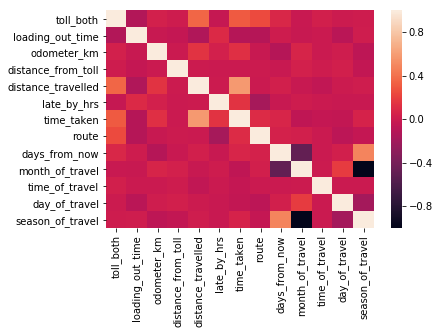

In [31]:
corr = new_toll_time.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [32]:
train_X = final_train_df.drop(['time_taken'], axis=1)
train_y = final_train_df['time_taken']

test_X = final_test_df.drop(['time_taken'], axis=1)
test_y = final_test_df['time_taken']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y, test_size=0.2, random_state=42)

In [34]:
scale= MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

# y_train_std = final_train_df['time_btn_toll']
# y_test_std = final_test_df['time_btn_toll']

In [80]:
# parameters = {
#     'hidden_layer_sizes':[15,20,30,40],
#     'activation':['logistic','relu','identity'],
#     'solver':['adam'],
#     'learning_rate':['invscaling','constant']
#              }

In [81]:
# reg_mlp = MLPRegressor( hidden_layer_sizes=(100,50),  activation='logistic', solver='adam', alpha=1, batch_size='auto',
#     learning_rate='constant', learning_rate_init=0.01, power_t=0.01, max_iter=5000, shuffle=False, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#     early_stopping=False,random_state=6, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [36]:
parameters = {"C": [1e1, 1e2, 1e3, 1e4],
                               "gamma": np.logspace(-2, 2, 5)}

In [37]:
reg_svr = SVR(kernel='rbf', gamma=0.1)

In [39]:
# grid = GridSearchCV(reg_svr, param_grid=parameters, n_jobs=-1,
#                    scoring='r2',
#                    verbose=1)
grid = GridSearchCV(reg_svr, cv=5,
                   param_grid=parameters, verbose=1, n_jobs=-1, scoring='r2')

In [40]:
X_train_scaled.shape, y_train.shape

((5106, 9), (5106,))

In [41]:
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.4min finished


In [42]:
print("Best parameters set found on development set:")
print(grid_result.best_estimator_)
print("Grid scores on development set:")
for parameters, mean_score, scores in grid_result.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() / 2, parameters))

Best parameters set found on development set:
SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Grid scores on development set:
0.168 (+/-0.008) for {'C': 10.0, 'gamma': 0.01}
0.324 (+/-0.011) for {'C': 10.0, 'gamma': 0.10000000000000001}
0.435 (+/-0.011) for {'C': 10.0, 'gamma': 1.0}
0.452 (+/-0.016) for {'C': 10.0, 'gamma': 10.0}
0.107 (+/-0.004) for {'C': 10.0, 'gamma': 100.0}
0.288 (+/-0.010) for {'C': 100.0, 'gamma': 0.01}
0.391 (+/-0.011) for {'C': 100.0, 'gamma': 0.10000000000000001}
0.500 (+/-0.011) for {'C': 100.0, 'gamma': 1.0}
0.649 (+/-0.026) for {'C': 100.0, 'gamma': 10.0}
0.353 (+/-0.007) for {'C': 100.0, 'gamma': 100.0}
0.326 (+/-0.012) for {'C': 1000.0, 'gamma': 0.01}
0.431 (+/-0.010) for {'C': 1000.0, 'gamma': 0.10000000000000001}
0.554 (+/-0.011) for {'C': 1000.0, 'gamma': 1.0}
0.712 (+/-0.020) for {'C': 1000.0, 'gamma': 10.0}
0.400 (+/-0.012) for {'C': 1000.0, 'gamma': 10

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



In [43]:
# reg_sv = SVR(C=1500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
#   kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [66]:
# reg_sv = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
#   kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [88]:
# SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
#   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
# reg_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
#            max_features='auto', max_leaf_nodes=50,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=4,
#            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
#            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [90]:
# reg_lin = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)

In [91]:
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [44]:
grid_result.best_estimator_.fit(X_train_scaled, y_train)
grid_result.best_estimator_.score(X_test_scaled, y_test)

0.69953703379571719

In [47]:
scores = cross_val_score(grid_result.best_estimator_, X_train_scaled, y_train, scoring='r2', n_jobs=-1)

In [48]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.03)


In [49]:
X_predict_scaled = MinMaxScaler().fit_transform(test_X)

In [50]:
predictions = grid_result.best_estimator_.predict(X_predict_scaled)

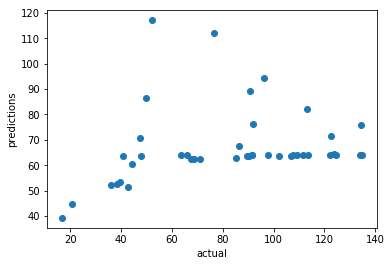

In [53]:
## The line / model
plt.scatter(test_y, predictions)
plt.ylabel('predictions')
plt.xlabel('actual')
# plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [54]:
test_df.shape, predictions.shape

((42, 25), (42,))

In [55]:
show_df = test_df.copy()

In [56]:
show_df['predicted'] = predictions

In [57]:
show_df['time_taken_delta'] = show_df['time_taken'].apply(lambda x: timedelta(hours=x))

In [58]:
show_df['predict_delta'] = show_df['predicted'].apply(lambda x: timedelta(hours=x))

In [59]:
show_df['predicted_ist_timestamp'] = show_df['ist_timestamp'] - show_df['time_taken_delta'] + show_df['predict_delta']

In [60]:
show_df['route'] = test_df['route'].replace(dict_route)

In [61]:
show_df['toll_both'] = show_df['toll_both'].replace(dict_toll_both)

In [62]:
show_df = show_df.sort_values(['route','vehicle_no','time_taken'])

In [63]:
show_df[['route','vehicle_no','toll_both','time_taken','predicted','ist_timestamp','predicted_ist_timestamp']]

,route,vehicle_no,toll_both,time_taken,predicted,ist_timestamp,predicted_ist_timestamp
4690,Jamshedpur HOSUR,OD04D5891,Sergrarh,63.595833,63.929903,2017-11-24 19:44:00,2017-11-24 20:04:02.649709
4601,Jamshedpur HOSUR,OD04D5891,Panikholi,66.002222,64.151447,2017-11-24 22:08:23,2017-11-24 20:17:20.208063
4473,Jamshedpur HOSUR,OD04D5891,Manguli,67.488056,62.286564,2017-11-24 23:37:32,2017-11-24 18:25:26.631366
4132,Jamshedpur HOSUR,OD04D5891,Gudipada (Old Gangapada),68.857500,62.432214,2017-11-25 00:59:42,2017-11-24 18:34:10.970111
4177,Jamshedpur HOSUR,OD04D5891,Gurapalli,71.043611,62.548083,2017-11-25 03:10:52,2017-11-24 18:41:08.097006
3929,Jamshedpur HOSUR,OD04D5891,Bellupada,85.191111,62.857815,2017-11-25 17:19:43,2017-11-24 18:59:43.133946
4425,Jamshedpur HOSUR,OD04D5891,Madapam,89.519722,63.650202,2017-11-25 21:39:26,2017-11-24 19:47:15.727832
4051,Jamshedpur HOSUR,OD04D5891,Chilakapalem,90.272500,63.684234,2017-11-25 22:24:36,2017-11-24 19:49:18.241700
4381,Jamshedpur HOSUR,OD04D5891,Laxmipuram,91.336389,63.985636,2017-11-25 23:28:26,2017-11-24 20:07:23.289011
4554,Jamshedpur HOSUR,OD04D5891,Nathavalasa/ Vizianagaram,91.336389,63.987893,2017-11-25 23:28:26,2017-11-24 20:07:31.413844
